# Module 24 - Spectral Analysis and Fourier Transforms

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/From_Continuous_To_Discrete_Fourier_Transform.gif" width=600px>

## Goals

- Spectral analysis
- Discrete Fourier transform
- Fast Fourier transform

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Spectral Analysis

There are entire courses taught on this subject (EE 171) where it is often referred to as *signal processing*.  We will learn how to extract information about the predictable or repeating parts of signals.

For a continous function $y(t)$, this is achieved by taking the Fourier transform:

\begin{equation}
\hat{y}(\omega) = \int_{-\infty}^{\infty} dt y(t) \mathrm{e}^{-i \omega t}.
\end{equation}

What do we do when we have discrete data sets?

### Discrete Fourier Transform

Consider a vector of $N$ data points $\vec{y} = (y_0,\ldots,y_{N-1})$.  This will often be a *time series*, the value of a function over a long period of time.  We assume that the measurements $y_j$ are made at equally spaced intervals where $t_j = j \Delta t$ with $j \in \mathbb{Z}$. 

In order to search for any repeating patterns in $\vec{y}$ we can represent construct a continuous represenation $y(t)$ using the *Dirac comb*:

\begin{equation}
y(t) = \sum_{j}^{N-1} y_j \delta(t - j\Delta t)
\end{equation}

then using our definition for the continuous Fourier transform:

\begin{align}
\hat{y}(\omega) &= \int_{-\infty}^{\infty} dt y(t) \mathrm{e}^{-i \omega j\Delta t} \newline
&= \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i \omega t} .
\end{align}

However, unlike the continous case, our signal has a finite range, $T$.  We can extend it by enforcing that $y(t+T) = y(t)$, i.e. we have a time-translational symmetry by $T$. This implies $y_j = y_{j+N}$ and

\begin{align}
\sum_{j=0}^{N-1} y_j \mathrm{e}^{-i \omega j \Delta t}  &= \sum_{j=0}^{N-1} y_{j+N} \mathrm{e}^{-i \omega (j+N)\Delta t} \newline
&= \sum_{j=0}^{N-1} y_{j} \mathrm{e}^{-i \omega j\Delta t} \mathrm{e}^{-i \omega T}
\end{align}

which is only possible if:

\begin{equation}
\mathrm{e}^{-i \omega T} = 1 \Leftrightarrow \omega = \omega_k =  \frac{2\pi}{N\Delta t} k \text{ where } k \in \mathbb{Z}.
\end{equation}

1. The smallest non-zero frequency is: $$\omega_1 = \frac{2\pi}{N\Delta t}.$$  We need lots of data at long times to investigate small frequencies.
2. The largest frequency we can study is $$\omega_{N-1} = \frac{2\pi(N-1)}{N\Delta t} \approx \frac{2\pi}{\Delta t}.$$  To study high frequency behavior we need a small time step $\Delta t \ll 1$.

We can now write the discrete Fourier transform of $y$ as:

\begin{align}
\hat{y}_k & = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i \omega_k j \Delta t} \newline
& = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi k j /N} .
\end{align}

Note:
\begin{equation}
\hat{y}_{k+N} = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi (k+N) j /N} = \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi j k/N}\mathrm{e}^{-i 2\pi j}= \hat{y}_k.
\end{equation}
There are only $N$ values of $k$.

### Inverse Fourier Transform

To reconstruct our original data set, we multiply both sides by $\mathrm{e}^{i 2\pi n k/N}$ and sum over $k$:

\begin{align}
\sum_{k=0}^{N-1} \hat{y}_k \mathrm{e}^{i 2\pi n k/N} & = \sum_{k=0}^{N-1}\mathrm{e}^{i 2\pi n k/N} \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i 2\pi k j /N} \newline
 &= \sum_{j=0}^{N-1} y_j \sum_{k=0}^{N-1} \mathrm{e}^{-i 2\pi k(j-n)/N}
\end{align}

and we recognize the definition of the Kronecker $\delta$-function:
\begin{equation}
\sum_{k=0}^{N-1} \mathrm{e}^{-i 2\pi k(j-j')/N} = N \delta_{j,j'}
\end{equation}
such that
\begin{equation}
y_n = \frac{1}{N} \sum_{k=0}^{N-1}\hat{y}_k \mathrm{e}^{i 2\pi n k/N} .
\end{equation}


<div class="span alert alert-success">
<h2> Programming challenge </h2>
Complete the code fragment below to implement the discrete Fourier transform.
</div>

In [2]:
from scipy.constants import pi as π
def fourier_transform(y):
    '''Return the discrete Fourier transform of y.'''
    N = y.size
    ŷ = np.zeros([N],dtype=complex)
    j = np.arange(N)
    for k in range(N):
        ŷ[k] = np.sum(y*np.exp(-complex(0,1)*2*π*k*j/N))
       # for j in range(N):
       #     ŷ[k] += y[j]*np.exp(-complex(0,1)*2*π*j*k/N)

    return ŷ

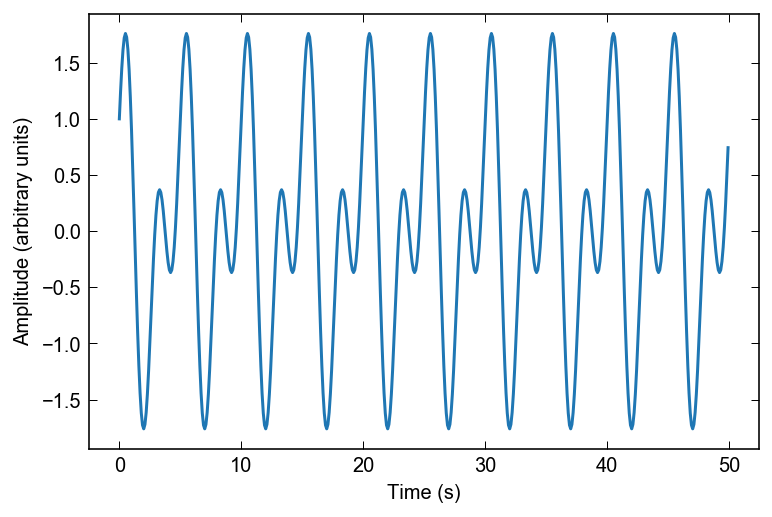

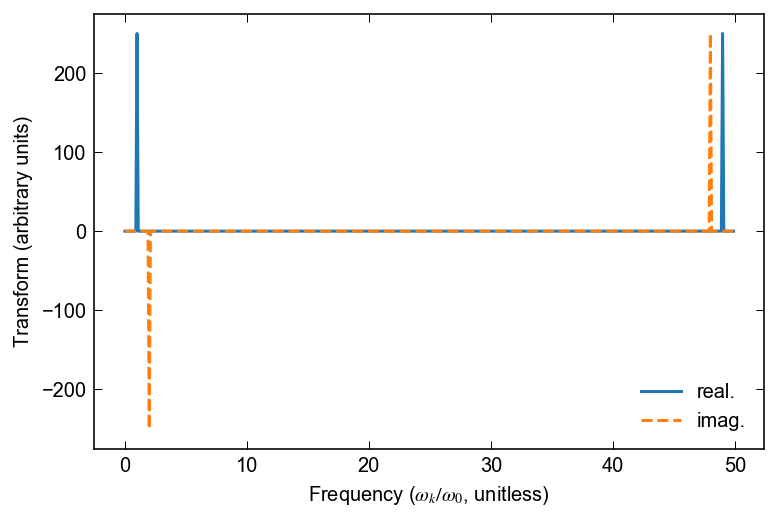

In [3]:
# the time series
Δt = 0.1
t = np.arange(0.0,50.0,Δt)
N = t.size
ω0 = 2.0*π*(0.2)
ϕ = 0.5*π
y = np.sin(ω0*t+ϕ) + np.sin(2*ω0*t)

# Plot the time series
plt.figure(1)
plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arbitrary units)')

# Get the discrete FT
ω = 2*π*np.arange(0,N)/(N*Δt)
ŷ = fourier_transform(y)

# Plot the real and imaginary parts of the DFT
plt.figure(2)
plt.plot(ω/ω0,ŷ.real,label='real.')
plt.plot(ω/ω0,ŷ.imag,linestyle='--',label='imag.')

plt.xlabel(r'Frequency ($\omega_k/\omega_0$, unitless)')
plt.ylabel('Transform (arbitrary units)')
plt.legend(loc='lower right')

## Power Spectrum

Sometimes we don't want the additional phase information and we only care about the location of the peaks in the spectrum.  It is related to the integrated temporal correlation function of the time series.  For a continuous function:

\begin{equation}
\int_{-\infty}^{\infty} d\tau \left[\int_{-\infty}^{\infty} dt y(t)y^\ast(t+\tau) \right] \mathrm{e}^{i\omega \tau} = \hat{y}(\omega)\hat{y}^\ast(\omega) = |\hat{y}(\omega)|^2
\end{equation}

where we have used the convolution property of the Fourier transform.

We can analze it for our previous time series in the discrete case:

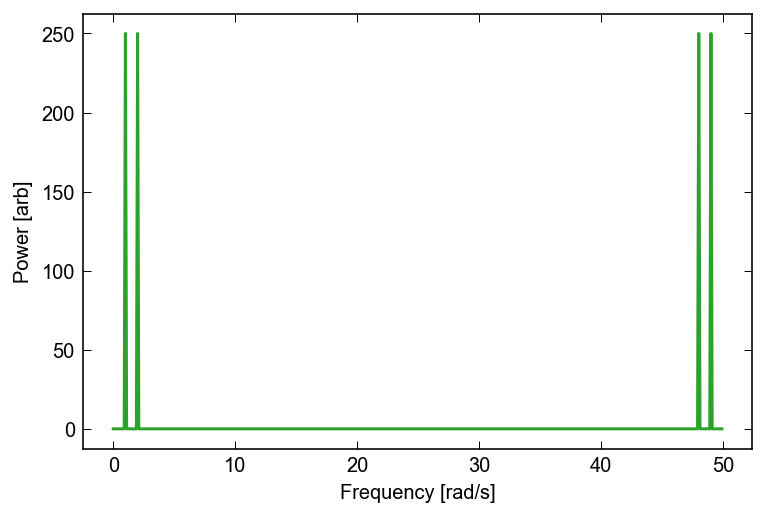

In [4]:
plt.figure()
plt.plot(ω/ω0,np.abs(ŷ),color=colors[2])
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Power [arb]')

### Let's investigate the power of the Fourier transform on some input data

[<matplotlib.text.Text at 0x10fbc3c50>, <matplotlib.text.Text at 0x10ff8d5f8>]

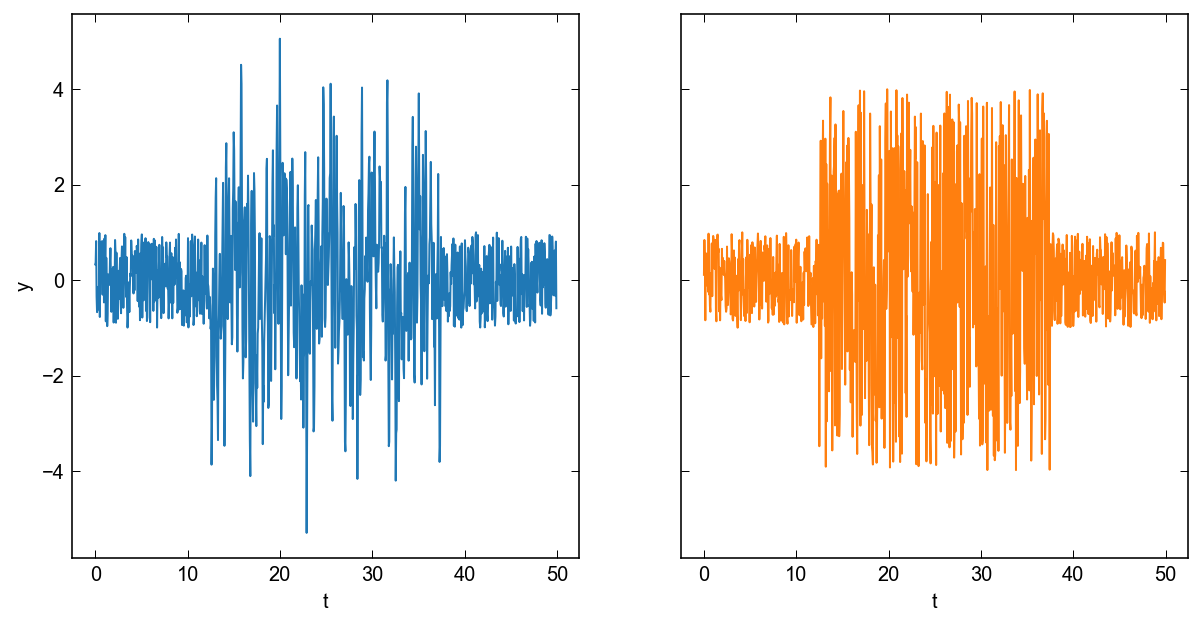

In [5]:
t,*y = np.loadtxt('data/signal.dat',unpack=True)
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=True, figsize=(10,5))
for i,ax in enumerate(axes):
    ax.plot(t,y[i],'-',color=colors[i], linewidth=1)

axes[0].set_ylabel('y')
[ax.set_xlabel('t') for ax in axes]

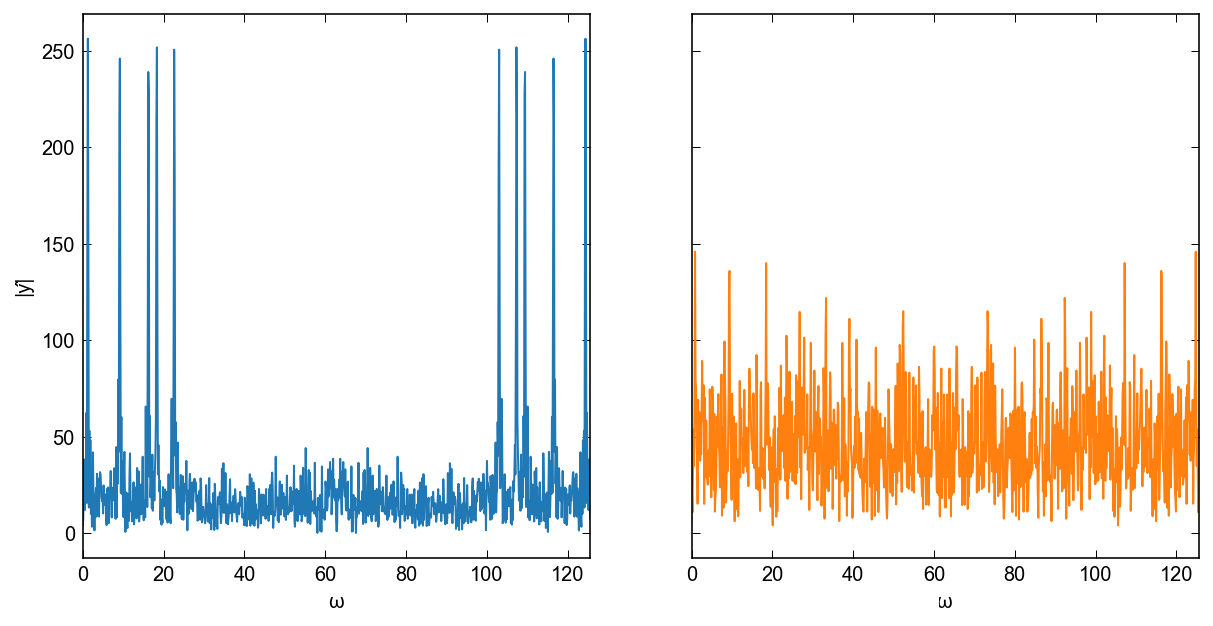

In [6]:
ω = 2*π*np.arange(0,t.size)/(t.size*(t[1]-t[0]))

fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=True, figsize=(10,5))
for i,ax in enumerate(axes):
    ŷ = fourier_transform(y[i])
    ax.plot(ω,np.abs(ŷ),color=colors[i], linewidth=1)
    ax.set_xlabel('ω')
    ax.set_xlim(0,ω[-1])

axes[0].set_ylabel('|ŷ|')

In all these examples, we have identifed some *natural* frequecies in the time series, but there were always two copies.

### What is the origin of the large frequency signals?

For a real signal we have: $y_j = y^\ast_j$.  Consider the complex conjugate of the Fourier tranform $\hat{y}^\ast_k$:

\begin{align}
\hat{y}^\ast_k &= \sum_{j=0}^{N-1} y^\ast_j \mathrm{e}^{i2\pi jk/N} \newline
 &= \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i2\pi j(-k)/N} \times \mathrm{e}^{-i 2\pi j N/N} \newline
 &= \sum_{j=0}^{N-1} y_j \mathrm{e}^{-i2\pi j(N-k)/N}  \newline
 &= \hat{y}_{N-k} .
\end{align}

Thus, the $N$ real data points are used to construct $N/2$ unique *complex* data.  The spectrum is completely described by the first $N/2$ frequencies.  Instead of $2\pi/\Delta t$ the largest frequency we can distinguish is half this value.

### Nyquist Frequency
$$\omega_{\rm Ny} = \frac{\pi}{\Delta t}$$

We can simply truncate our discrete Fourier transform, plotting the meaningful independent components.

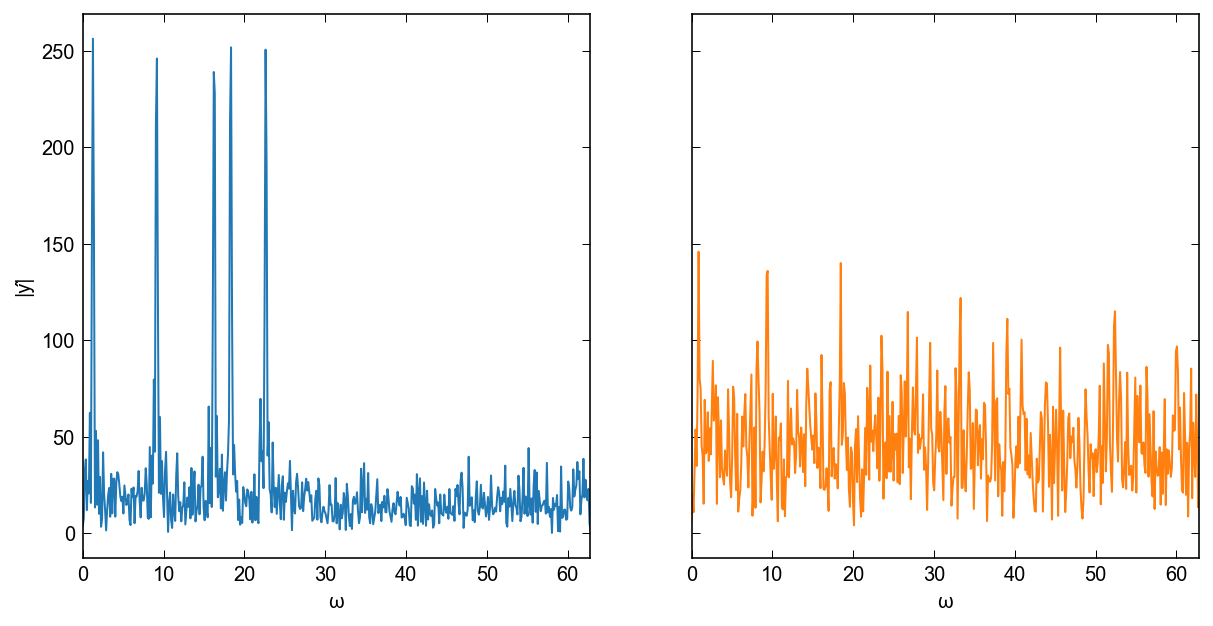

In [7]:
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=True, figsize=(10,5))
for i,ax in enumerate(axes):
    ŷ = fourier_transform(y[i])
    ax.plot(ω,np.abs(ŷ),color=colors[i], linewidth=1)
    ax.set_xlabel('ω')
    ax.set_xlim(0,0.5*ω[-1])

axes[0].set_ylabel('|ŷ|')

In practice, we want $\omega_{\rm Ny}$ to be considerably larger then any Fourier components that are expected to be present in the signal.

1. In experiments: use a low-pass filter.
2. In simulations, make sure $\Delta t <<$ any intrinsic time scales.

## Fast Fourier Transform

In 1965, Cooley and Tukey introduced an algorithm, now known as the *fast fourier transform* (FFT) which is of order: $\mathrm{O}(N\log_2N)$ *provided* that $N=2^n;\; n\in\mathbb{Z}$.  Deriving the algorithm is quite complicated, but all languages provide **black box** routines to return the FFT.  It can be evaluated in Python via `np.fft.fft`: https://docs.scipy.org/doc/numpy/reference/routines.fft.html

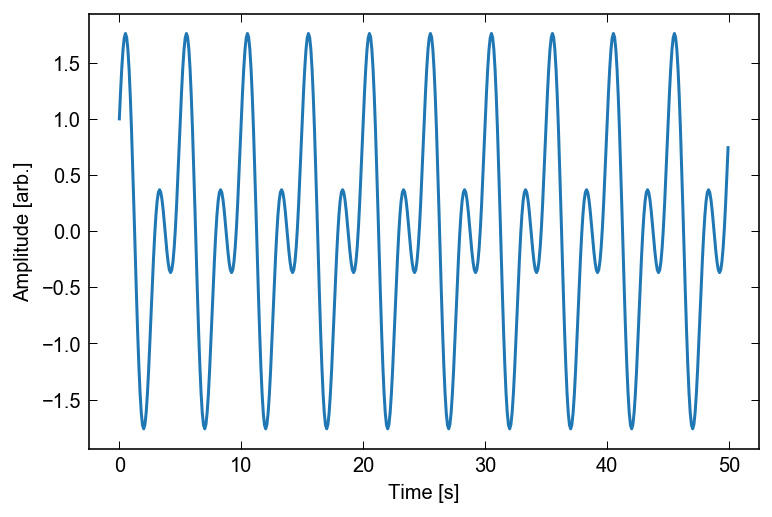

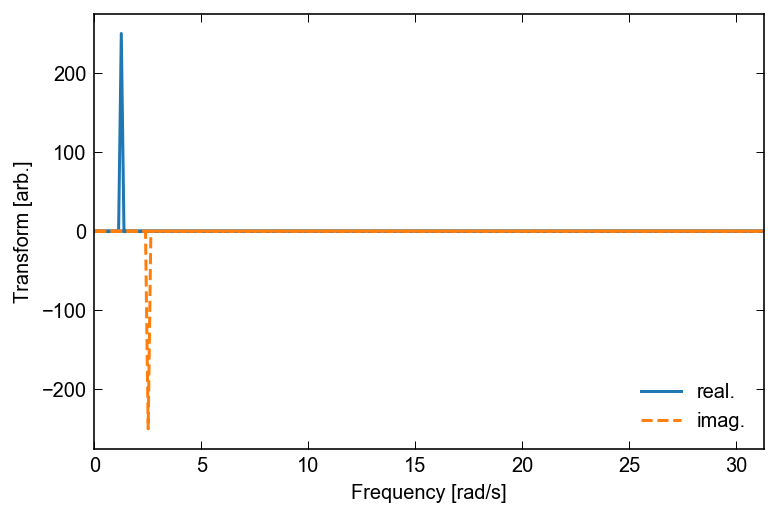

In [8]:
def fast_fourier_transform(t,y):
    '''Return the fast Fourier transform of y.'''
    ŷ = np.fft.fft(y)
    ω = 2*π*np.fft.fftfreq(t.size,t[1]-t[0])
    return ω,ŷ

# the time series
Δt = 0.1
t = np.arange(0.0,50.0,Δt)
ω0 = 2.0*π*(0.2)
ϕ = 0.5*π
y = np.sin(ω0*t + ϕ) + np.sin(2*ω0*t)

# Plot the time series
plt.figure()
plt.plot(t,y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [arb.]')

# Get the discrete FT
ω,ŷ = fast_fourier_transform(t,y)

# Plot the real and imaginary parts of the DFT
plt.figure()
plt.plot(ω,ŷ.real,label='real.')
plt.plot(ω,ŷ.imag,linestyle='--',label='imag.')
plt.xlim(0,np.max(ω))
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Transform [arb.]')
plt.legend(loc='lower right')

<div class="span alert alert-danger">
np.fft.fft wraps frequencies above the Nyquist frequency to $\omega < 0$.
</div>

### Let's confirm the speedup factor

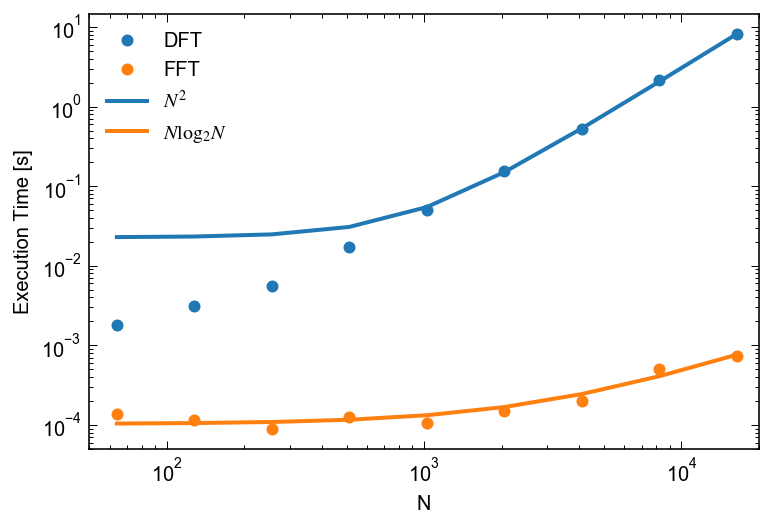

In [9]:
import timeit
N = np.array([2**n for n in range(6,15)])
dft,fft = [],[]
for cN in N:
    t = np.linspace(0,20,cN)
    y = np.sin(t)
    
    dft.append(timeit.timeit('fourier_transform(y)', number=1, globals=globals()))
    fft.append(timeit.timeit('fast_fourier_transform(t,y)', number=1, globals=globals()))
    
dft = np.array(dft)
fft = np.array(fft)

from scipy.optimize import curve_fit

def N2(x,*a):
    '''N^2'''
    return a[0] + a[1]*x**2

def NlogN(x,*a):
    '''power function.'''
    return a[0] + a[1]*x*np.log2(x)

# perform the fits
a1,a1_cov = curve_fit(N2,N,dft,p0=(1,1))
a2,a2_cov = curve_fit(NlogN,N,fft,p0=(1,1))

# plot the timing results
plt.figure()
plt.loglog(N,dft,'o', markersize=6, mec='None', mfc=colors[0], label='DFT')
plt.loglog(N,fft,'o', markersize=6, mec='None', mfc=colors[1], label='FFT')

# Plot the fits
plt.loglog(N,N2(N,*a1),'-', color=colors[0], zorder=0, linewidth=2, label=r'$N^2$')
plt.loglog(N,NlogN(N,*a2),'-', color=colors[1], zorder=0, linewidth=2, label=r'$N\log_2N$')

plt.xlim(50,20000)
plt.legend(loc='upper left')
plt.xlabel('N')
plt.ylabel('Execution Time [s]')

## Waves on a string using normal modes

We can solve the simple wave equation (no friction or gravity) analytically using separation of variables, where the solution is the product of a function of space and a function of time

\begin{equation}
    y(x,t) = X(x)T(x)
\end{equation}

Substituting this into

\begin{equation}
    \frac{\partial^2 y (x,t)}{\partial t^2} = c^2 \frac{\partial^2 y (x,t)}{\partial x^2},
\end{equation}

and dividing by $y(x,t)$ we are left with two ODEs:

\begin{align}
    \frac{\partial^2 T (t)}{\partial t^2} + \omega^2 T(t) &= 0 \\
    \frac{\partial^2 X (x)}{\partial x^2} + k^2 X(x) &= 0,
\end{align}

where $\omega$ is the angular frequency and $k=\frac{\omega}{c}$ is the wave vector.

We can write the solution to the wave equation in a form equivalent to taking the inverse Fourier transform of the Fourier transform of the wave at $t=0$ and propagated in time by the term $\cos(\omega_n t)$:

\begin{align}
    y(x,t) &= \frac{1}{N} \sum_{k=0}^{N-1}\hat{y}(x,t=0)_k \mathrm{e}^{i 2\pi k x/L} \cos(\omega_n t)\\
    y(x,t) &= \frac{1}{N} \sum_{k=0}^{N-1}\hat{y}(x,t=0)_k \mathrm{e}^{i 2\pi k x/L} \cos(2 \pi c k t/L)
\end{align}

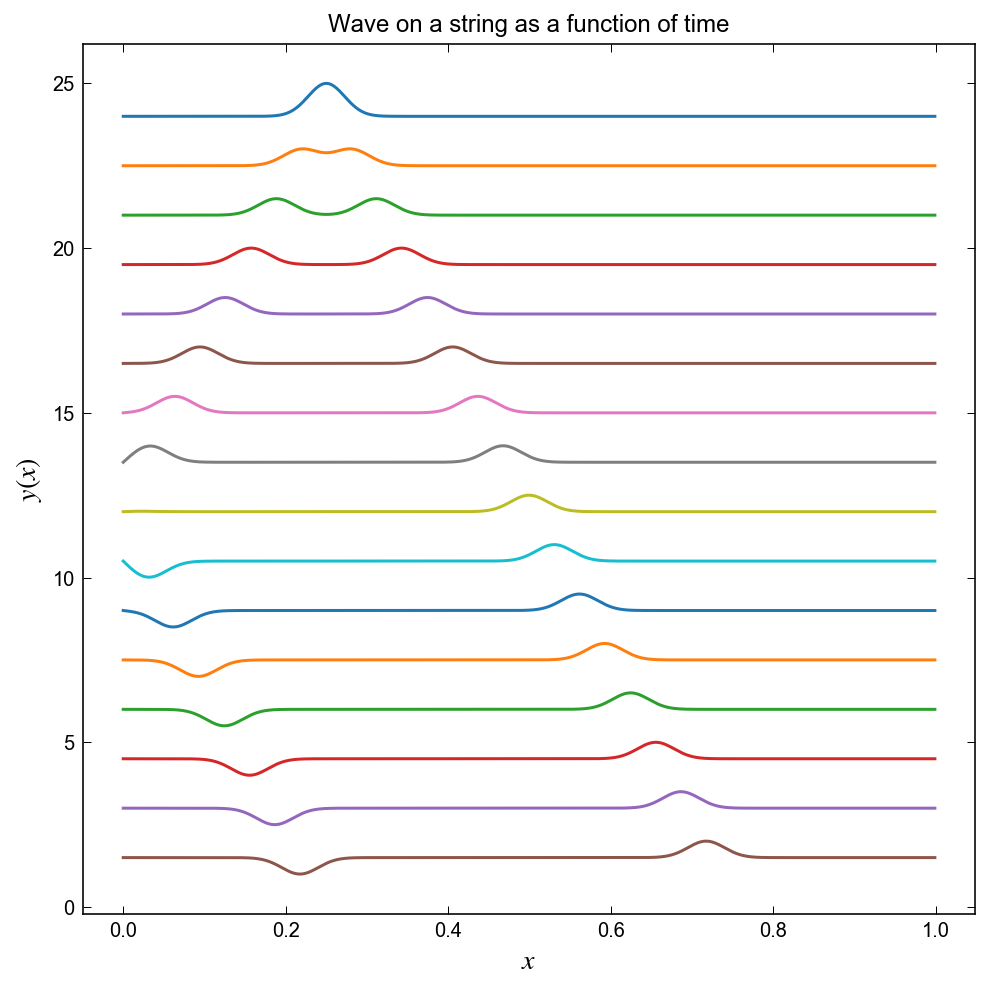

In [10]:
c = 1                 # wave velocity on string
L = 1.0               # string length
dx = 0.001
dt = 0.001

x = np.arange(0, L, dx)
x_grid_size = len(x)

t_iter = 500         # number of time iterations

r = c*dt/dx

y = np.zeros((x_grid_size, t_iter))  # string height at point x

for i in range(x_grid_size): # set the initial configuration at t=0 and t=1, use gaussian shape
    y[i,0] = np.exp(-1000*(x[i]-L/4.0)**2)
    y[i,1] = np.exp(-1000*(x[i]-L/4.0)**2)

for n in range(1, t_iter-1):
    for i in range(1, x_grid_size-1):
        y[i,n+1] = 2*(1 - r*r)*y[i,n] - y[i,n-1] + r*r*(y[i+1,n] + y[i-1,n])
        
Nlines = 16
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y[:,i*t_iter//Nlines]+(Nlines-i)*1.5)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a string as a function of time')

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


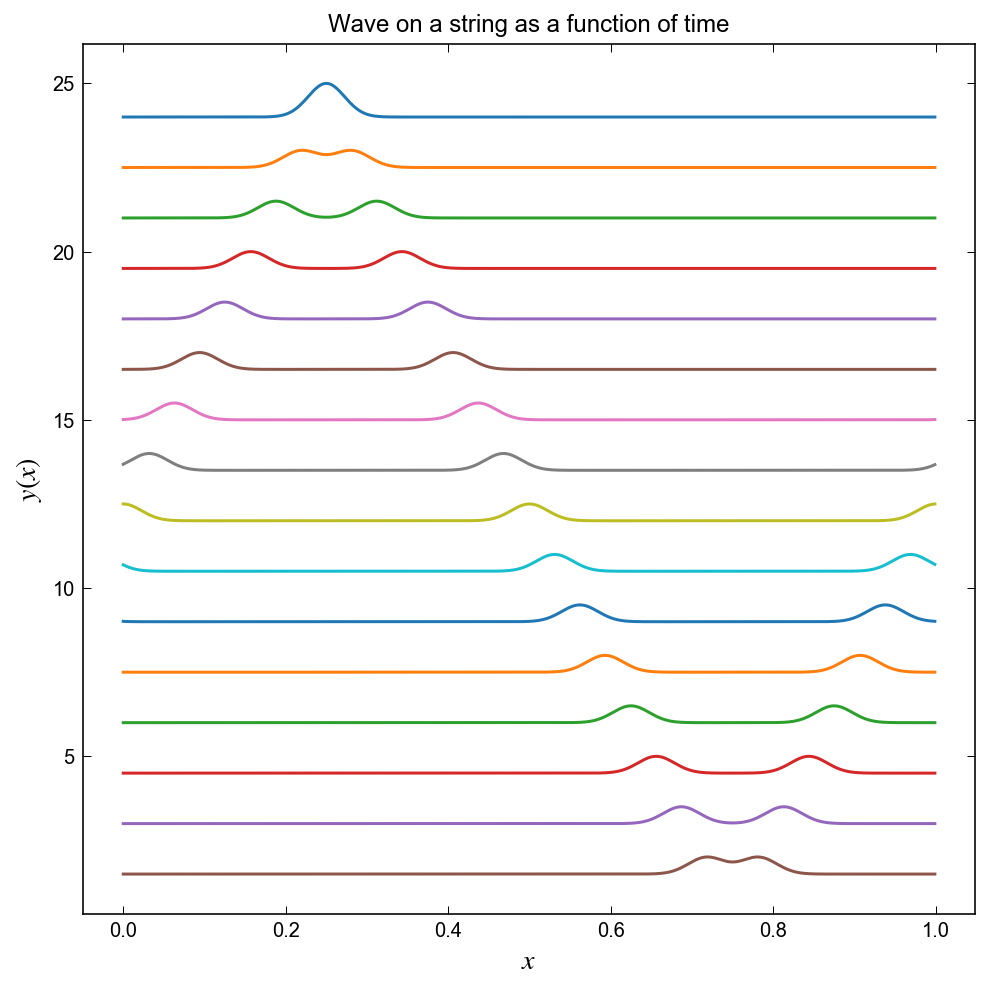

In [11]:
ŷ = np.fft.fft(y[:,0])
y2 = np.zeros((x_grid_size, t_iter),dtype=complex)

for n in range(t_iter):
    t = n*dt
    #for k in range(len(ŷ)):
    #    y2[:,n] += ŷ[k]*np.exp(complex(0,1)*2*np.pi*k*x/L)*np.cos(2*np.pi*c*k*t/L)/x_grid_size
    k = np.arange(len(ŷ))
    y2[:,n] += np.fft.ifft(ŷ*np.cos(2*np.pi*c*k*t/L))

Nlines = 16
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y2[:,i*t_iter//Nlines]+(Nlines-i)*1.5)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a string as a function of time')